#FRESH FRUIT & ROTTEN FRUIT CLASSIFICATION
##Transfer Learning (VGG16)
##Dataset : https://www.kaggle.com/sriramr/fruits-fresh-and-rotten-for-classification

In [ ]:
from tensorflow import keras
from glob import glob
from tensorflow.keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt
import numpy as np

#Preparing dataset (training and validation)

In [ ]:
BATCH_SIZE = 16

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Colab_Notebooks/DL/Projects/Classification/Fresh_Fruits_and_Rotten_Fruits

/content/drive/MyDrive/Colab_Notebooks/DL/Projects/Classification/Fresh_Fruits_and_Rotten_Fruits


In [ ]:
pwd

'/content/drive/MyDrive/Colab_Notebooks/DL/Projects/Classification/Fresh_Fruits_and_Rotten_Fruits'

##Training set

In [ ]:
train_data = 'dataset/train'
train_datagen = keras.preprocessing.image.ImageDataGenerator()
training_set = train_datagen.flow_from_directory(train_data, batch_size=BATCH_SIZE, class_mode='categorical')

Found 10901 images belonging to 6 classes.


In [ ]:
NUM_CLASSES = glob('dataset/train/*')
NUM_CLASSES

['dataset/train/freshapples',
 'dataset/train/freshbanana',
 'dataset/train/freshoranges',
 'dataset/train/rottenapples',
 'dataset/train/rottenbanana',
 'dataset/train/rottenoranges']

##Validation set

In [ ]:
validation_data = 'dataset/test'
validation_datagen = keras.preprocessing.image.ImageDataGenerator()
validation_set = validation_datagen.flow_from_directory(validation_data, batch_size=BATCH_SIZE, class_mode='categorical')

Found 2698 images belonging to 6 classes.


#Building the model

In [ ]:
IMAGE_SIZE = 224

##Base model (VGG16)

In [ ]:
#create the base model from the pre-trained VGG16 model with ANN part removed
vgg16 = VGG16(input_shape=[IMAGE_SIZE]+[IMAGE_SIZE]+[3], weights='imagenet', include_top=False)

#freeze the convolutional base
for layer in vgg16.layers:
  layer.trainable = False

#base model summary
vgg16.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

##Base model (VGG16) + Our layers

In [ ]:
#initialising the model
model_vgg16 = keras.models.Sequential()

#Input layer
model_vgg16.add(keras.layers.Input(shape=(None, None, 3)))

#Resizing layer
model_vgg16.add(keras.layers.experimental.preprocessing.Resizing(height=IMAGE_SIZE, width=IMAGE_SIZE))

#Rescaling layer
model_vgg16.add(keras.layers.experimental.preprocessing.Rescaling(scale=1./255))

#Data augmentation layers
model_vgg16.add(keras.layers.experimental.preprocessing.RandomRotation(0.2))
model_vgg16.add(keras.layers.experimental.preprocessing.RandomZoom(0.2))
model_vgg16.add(keras.layers.experimental.preprocessing.RandomFlip(mode="horizontal"))

#Base model
model_vgg16.add(vgg16)  

#Flatten
model_vgg16.add(keras.layers.Flatten()) 

#Hidden layer
model_vgg16.add(keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_uniform'))

#Dropout layer
model_vgg16.add(keras.layers.Dropout(rate=0.5))

#Output layer
model_vgg16.add(keras.layers.Dense(units=len(NUM_CLASSES), activation='softmax')) 

#compiling the model
model_vgg16.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#view the structure of the model
model_vgg16.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 224, 224, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 random_rotation (RandomRota  (None, 224, 224, 3)      0         
 tion)                                                           
                                                                 
 random_zoom (RandomZoom)    (None, 224, 224, 3)       0         
                                                                 
 random_flip (RandomFlip)    (None, 224, 224, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                        

#Training phase

In [12]:
#training the model on the training set and evaluating it on the validation set
model_vgg16_history = model_vgg16.fit(x=training_set, validation_data=validation_set, epochs=25)

Epoch 1/25
682/682 [==============================] - 4002s 6s/step - loss: 0.8162 - accuracy: 0.6960 - val_loss: 0.3332 - val_accuracy: 0.9033
Epoch 2/25
682/682 [==============================] - 89s 131ms/step - loss: 0.5636 - accuracy: 0.7825 - val_loss: 0.2553 - val_accuracy: 0.9218
Epoch 3/25
682/682 [==============================] - 88s 130ms/step - loss: 0.5018 - accuracy: 0.8043 - val_loss: 0.2119 - val_accuracy: 0.9181
Epoch 4/25
682/682 [==============================] - 88s 130ms/step - loss: 0.4428 - accuracy: 0.8322 - val_loss: 0.1899 - val_accuracy: 0.9322
Epoch 5/25
682/682 [==============================] - 88s 130ms/step - loss: 0.4353 - accuracy: 0.8356 - val_loss: 0.1798 - val_accuracy: 0.9370
Epoch 6/25
682/682 [==============================] - 89s 130ms/step - loss: 0.3985 - accuracy: 0.8477 - val_loss: 0.2167 - val_accuracy: 0.9248
Epoch 7/25
682/682 [==============================] - 89s 130ms/step - loss: 0.3897 - accuracy: 0.8528 - val_loss: 0.1394 - val_acc

##Plot the loss & accuracy

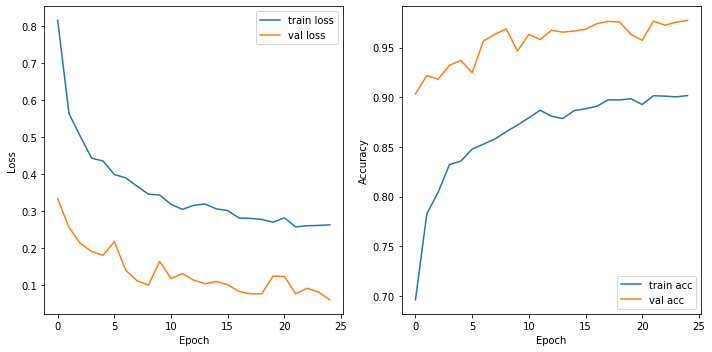

In [13]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(model_vgg16_history.history['loss'], label='train loss')
plt.plot(model_vgg16_history.history['val_loss'], label='val loss')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.subplot(1,2,2)
plt.plot(model_vgg16_history.history['accuracy'], label='train acc')
plt.plot(model_vgg16_history.history['val_accuracy'], label='val acc')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()

In [14]:
##save the trained model as a h5 file
model_vgg16.save('model_vgg16_FF_RF.h5')

In [15]:
##load the trained model
trained_model_vgg16 = keras.models.load_model('model_vgg16_FF_RF.h5')
trained_model_vgg16.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 224, 224, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 random_rotation (RandomRota  (None, 224, 224, 3)      0         
 tion)                                                           
                                                                 
 random_zoom (RandomZoom)    (None, 224, 224, 3)       0         
                                                                 
 random_flip (RandomFlip)    (None, 224, 224, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                        

#Testing phase

In [20]:
##predicting single test data
td = 'dataset/test/freshapples/rotated_by_15_Screen Shot 2018-06-08 at 4.59.49 PM.png'
ti = keras.preprocessing.image.load_img(td)  #image reading
ti = keras.preprocessing.image.img_to_array(ti) #(h, w, 3)
ti = np.array([ti]) #(n, h, w, 3)

#prediction
res = trained_model_vgg16.predict(ti)
np.argmax(res)

0